In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
data_path = "data"
files = os.listdir(data_path)
files

['.ipynb_checkpoints',
 'adult.data',
 'adult.names',
 'adult.test',
 'adult.zip',
 'Index',
 'old.adult.names',
 'Status.txt',
 'test_cleaned.csv',
 'train_cleaned.csv']

In [3]:
# Preview files
from pathlib import Path
train_data = Path("data/adult.data")
test_data = Path("data/adult.test")
information_file = Path("data/adult.names")

# Read data into pandas dataframe
pd.read_csv(train_data)
# There's no header?columns.
#

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
#pd.read_csv("data/adult.names")

with open("data/adult.names") as lines:
    
    for line in lines:
        print(line)

| This data was extracted from the census bureau database found at

| http://www.census.gov/ftp/pub/DES/www/welcome.html

| Donor: Ronny Kohavi and Barry Becker,

|        Data Mining and Visualization

|        Silicon Graphics.

|        e-mail: ronnyk@sgi.com for questions.

| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)

| 45222 if instances with unknown values are removed (train=30162, test=15060)

| Duplicate or conflicting instances : 6

| Class probabilities for adult.all file

| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)

| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)

|

| Extraction was done by Barry Becker from the 1994 Census database.  A set of

|   reasonably clean records was extracted using the following conditions:

|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

|

| Prediction task is to determine whether a

In [5]:
with open("data/old.adult.names") as lines:
    
    for line in lines:
        print(line)

1. Title of Database: adult

2. Sources:

   (a) Original owners of database (name/phone/snail address/email address)

       US Census Bureau.

   (b) Donor of database (name/phone/snail address/email address)

       Ronny Kohavi and Barry Becker, 

       Data Mining and Visualization

       Silicon Graphics.

       e-mail: ronnyk@sgi.com

   (c) Date received (databases may change over time without name change!)

       05/19/96

3. Past Usage:

   (a) Complete reference of article where it was described/used

        @inproceedings{kohavi-nbtree,

           author={Ron Kohavi},

           title={Scaling Up the Accuracy of Naive-Bayes Classifiers: a 

                  Decision-Tree Hybrid},

           booktitle={Proceedings of the Second International Conference on

                      Knowledge Discovery and Data Mining},

           year = 1996,

           pages={to appear}}

   (b) Indication of what attribute(s) were being predicted 

       Salary greater or less than

In [6]:
with open(Path("data/adult.names")) as fp:
    columns = []
    for line in fp:
        #print(line)
        sre = re.match(r'(?P<colname>[a-z\-]+):.*\.', line)
        if sre:
            columns.append(sre.group('colname'))
    columns.append('income')

In [7]:
print(columns)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [8]:
train_arguments = {"header": None, "names": columns}
train_df = pd.read_csv(train_data, **train_arguments)

In [9]:
train_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
test_arguments = {"header": None, "names": columns, "skiprows":1}
test_df = pd.read_csv(test_data, **test_arguments)

In [11]:
test_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [12]:
print(f"Number of instances in Training data is: {len(train_df)}\nNumber of instances in Test data is: {len(test_df)}")

Number of instances in Training data is: 32561
Number of instances in Test data is: 16281


In [13]:
train_df.columns =  train_df.columns.str.replace("-", "_")
test_df.columns= test_df.columns.str.replace("-","_")

In [14]:
print(train_df.columns)
print(train_df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')
Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  native_country  16281 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [17]:
train_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [18]:
test_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [19]:
NUMERICAL_COLUMNS = ["age", "fnlwgt","education_num", "capital_gain", "capital_loss", "hours_per_week"]
CATEGORICAL_COLUMNS = ["workclass", "education", "marital_status","occupation", "relationship", "race", "sex", "native_country"]
LABEL = ["income"]

In [20]:
# Check the percentage of each category available to see distribution \
# most data was drawn from
for feature in CATEGORICAL_COLUMNS:
    frequency = train_df[feature].value_counts(normalize = True).reset_index(name = "Relative_Percentage")
    print("\n")
    print(frequency)



               index  Relative_Percentage
0            Private             0.697030
1   Self-emp-not-inc             0.078038
2          Local-gov             0.064279
3                  ?             0.056386
4          State-gov             0.039864
5       Self-emp-inc             0.034274
6        Federal-gov             0.029483
7        Without-pay             0.000430
8       Never-worked             0.000215


            index  Relative_Percentage
0         HS-grad             0.322502
1    Some-college             0.223918
2       Bachelors             0.164461
3         Masters             0.052916
4       Assoc-voc             0.042443
5            11th             0.036086
6      Assoc-acdm             0.032769
7            10th             0.028654
8         7th-8th             0.019840
9     Prof-school             0.017690
10            9th             0.015786
11           12th             0.013298
12      Doctorate             0.012684
13        5th-6th             

In [21]:
for feature in CATEGORICAL_COLUMNS:
    frequency = test_df[feature].value_counts(normalize = True).reset_index(name = "Relative_Percentage")
    print("\n")
    print(frequency)



               index  Relative_Percentage
0            Private             0.688533
1   Self-emp-not-inc             0.081138
2          Local-gov             0.064062
3                  ?             0.059149
4          State-gov             0.041951
5       Self-emp-inc             0.035563
6        Federal-gov             0.028991
7        Without-pay             0.000430
8       Never-worked             0.000184


            index  Relative_Percentage
0         HS-grad             0.324489
1    Some-college             0.220318
2       Bachelors             0.163995
3         Masters             0.057367
4       Assoc-voc             0.041705
5            11th             0.039125
6      Assoc-acdm             0.032799
7            10th             0.028008
8         7th-8th             0.018979
9     Prof-school             0.015847
10            9th             0.014864
11           12th             0.013758
12      Doctorate             0.011117
13        5th-6th             

In [22]:
# Check to see the values and number of unique values in each feature column
for feature in CATEGORICAL_COLUMNS:
    print(f"==========================={feature}===========================")
    print(train_df[feature].unique())
    print(f"There are {train_df[feature].nunique()} unique values of this feature")


===========================workclass===========================
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
There are 9 unique values of this feature
===========================education===========================
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
There are 16 unique values of this feature
===========================marital_status===========================
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
There are 7 unique values of this feature
===========================occupation===========================
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-in

In [23]:
# Check to see the values and number of unique values in each feature column
for feature in CATEGORICAL_COLUMNS:
    print(f"==========================={feature}===========================")
    print(test_df[feature].unique())
    print(f"There are {test_df[feature].nunique()} unique values of this feature")


===========================workclass===========================
[' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked']
There are 9 unique values of this feature
===========================education===========================
[' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' Doctorate' ' 5th-6th' ' Assoc-voc'
 ' 9th' ' 12th' ' 1st-4th' ' Preschool']
There are 16 unique values of this feature
===========================marital_status===========================
[' Never-married' ' Married-civ-spouse' ' Widowed' ' Divorced'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse']
There are 7 unique values of this feature
===========================occupation===========================
[' Machine-op-inspct' ' Farming-fishing' ' Protective-serv' ' ?'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-support' ' Sa

In [24]:
for feature in CATEGORICAL_COLUMNS:
    train_df[feature] = train_df[feature].str.strip()
    test_df[feature] = test_df[feature].str.strip()

test_df['income'] = test_df['income'].str.strip(".")

In [25]:
for feature in CATEGORICAL_COLUMNS:
    print(f"==========================={feature}===========================")
    print(test_df[feature].unique())
    print(f"There are {test_df[feature].nunique()} unique values of this feature")


===========================workclass===========================
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
There are 9 unique values of this feature
===========================education===========================
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
There are 16 unique values of this feature
===========================marital_status===========================
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
There are 7 unique values of this feature
===========================occupation===========================
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 

In [26]:
# check to see the missing value in the test set
train_native_country = set(train_df.native_country)
test_native_country = set(test_df.native_country)

In [27]:
# Find the difference between the sets (elements in one but not the other)
missing_class = train_native_country.difference(test_native_country) #| test_native_country.difference(train_native_country)

In [28]:
# The class missing from the test data
missing_class

{'Holand-Netherlands'}

In [29]:
# Check for imbalanced target
train_df.income.value_counts('f') 


 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64

In [30]:
test_df.income.value_counts('f')

 <=50K    0.763774
 >50K     0.236226
Name: income, dtype: float64

In [31]:
from utils import create_directories

In [32]:
create_directories(["visualization"])

created directory at visualization


In [33]:
visualization_utils = Path("visualization/viz_utils.py")

In [34]:
%%writefile {visualization_utils}
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



def plot(data, column, hues= "income"):
    """
    Args:
        data (pd.DataFrame): the data frame to be used for the plot
        column (str): name of feature to be ploted on the x axis
        hues (str, optional): name of feature to used to assign colors to each category if not 
        then y label is used in this case income
    Returns:
        None
        
    """
    plt.figure(figsize=(10,5))
    ax = sns.countplot(data, x=column, hue = hues, edgecolor = 'k', palette = 'Set2')
    plt.xticks(rotation=90)
    ax.set_title(f"{column.title()} / {hues.title()}")
    ax.set_xlabel(f"{column.title()}")
    plt.show()


def num_plot(data, column, label = "income"):
    
    """
    Args:
        data (pd.DataFrame): the data frame to be used for the plot
        column (str): name of feature to be plotted on the x-axis
        hues (str, optional): name of the feature to be used to assign colors to each category if not 
        then y label is used in this case income
    Returns:
        None
        
    """

    plt.figure(figsize=(10,5))
    ax = sns.FacetGrid(data, row=label, margin_titles=True, aspect=4, height=3)
    ax.map(plt.hist, column, bins= 100)
    plt.show()

Overwriting visualization\viz_utils.py


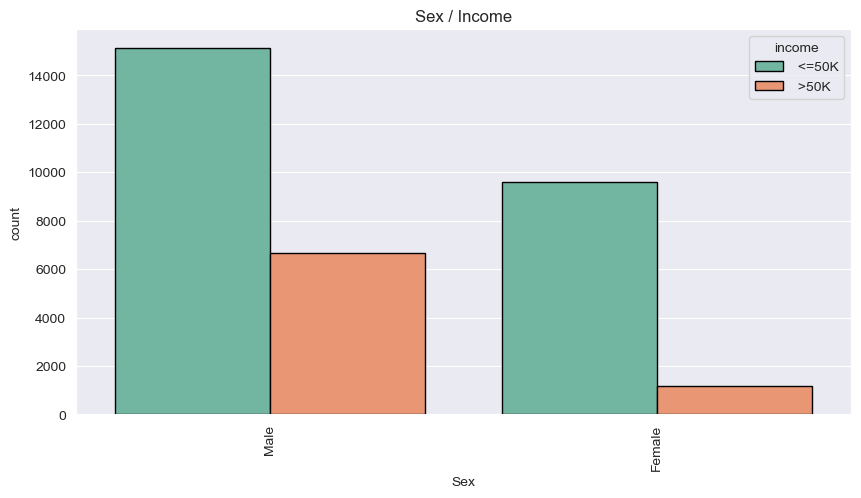

In [35]:
from visualization.viz_utils import plot

plot(train_df, "sex")

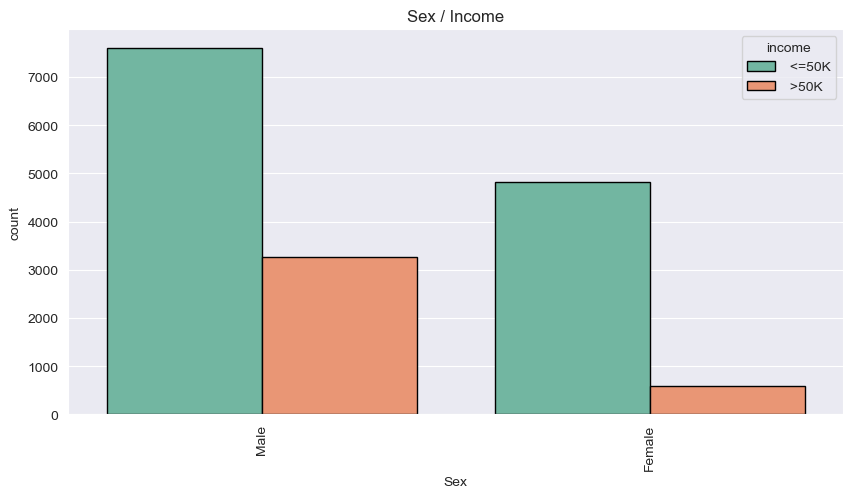

In [36]:
plot(test_df, "sex")

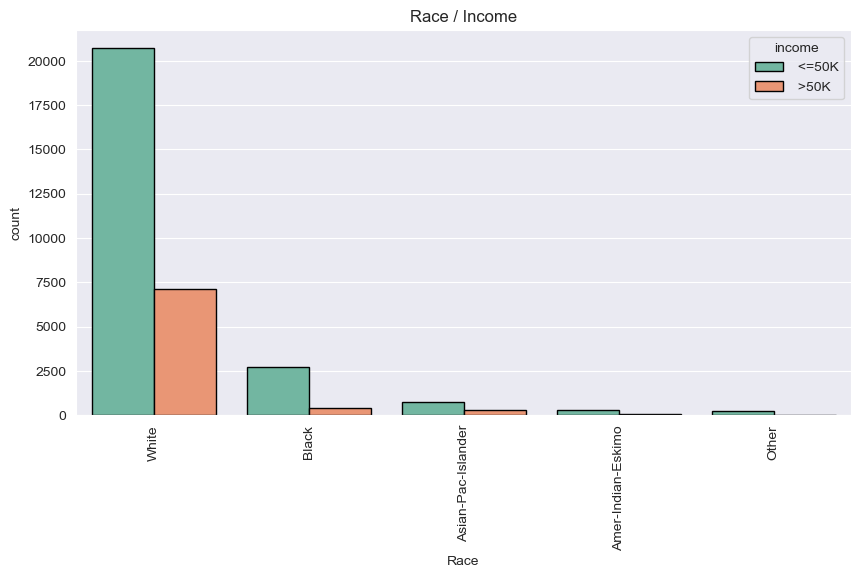

In [37]:
plot(train_df, "race")

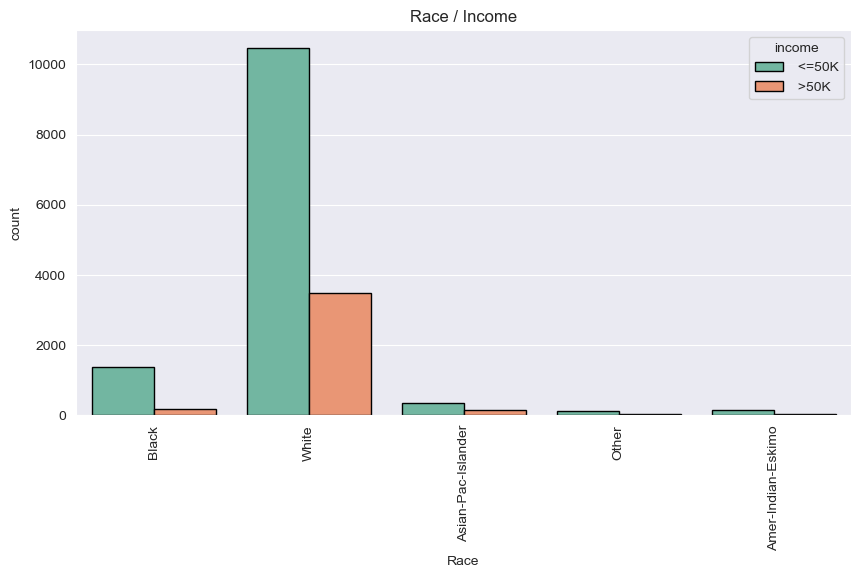

In [38]:
plot(test_df, "race")

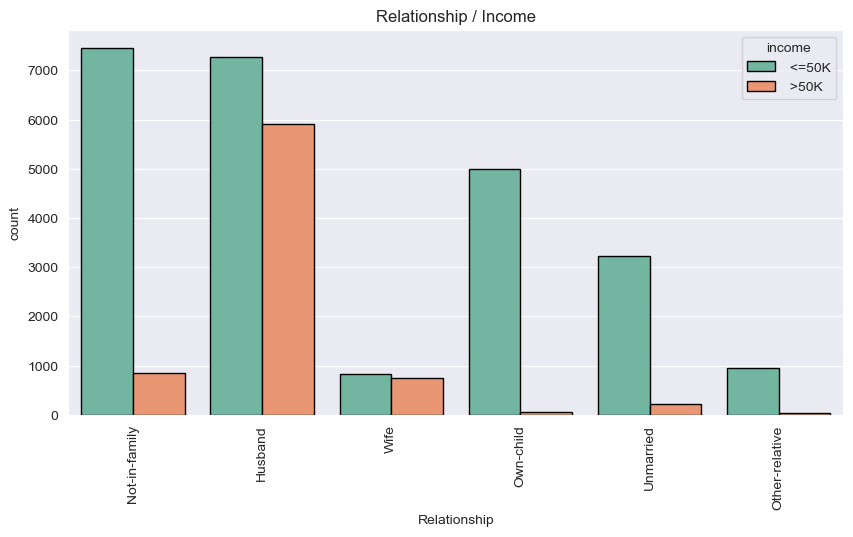

In [39]:
plot(train_df, "relationship")

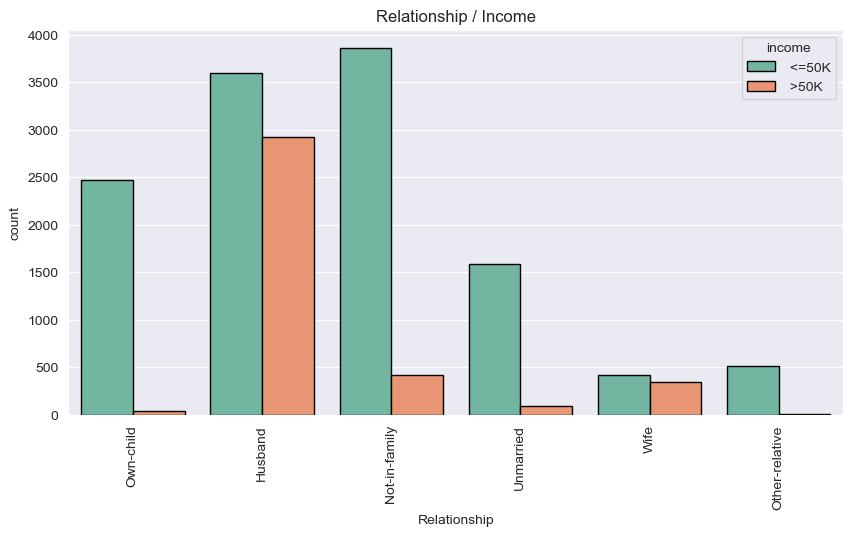

In [40]:
plot(test_df, "relationship")

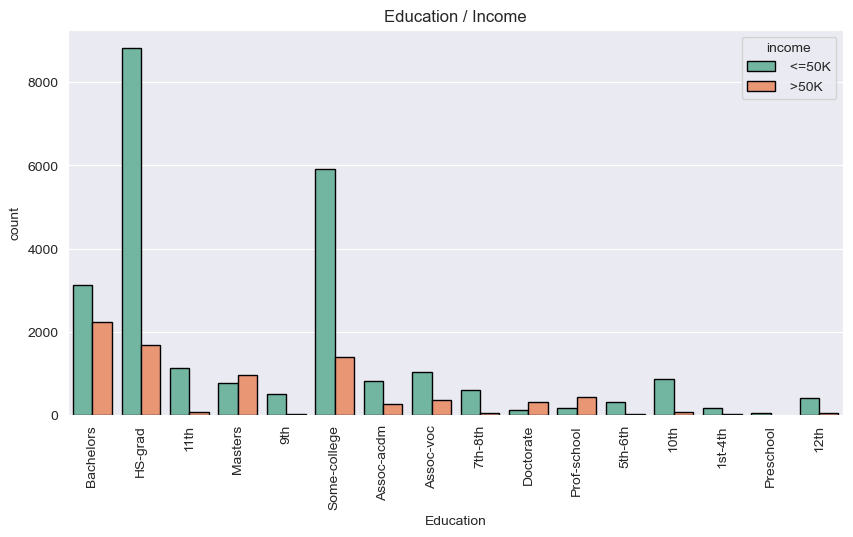

In [41]:
plot(train_df, "education")


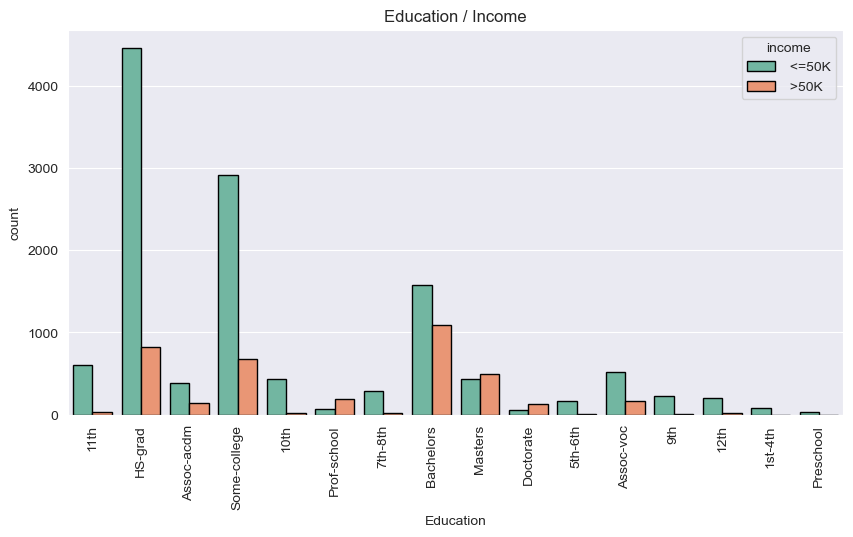

In [42]:
plot(test_df, "education")

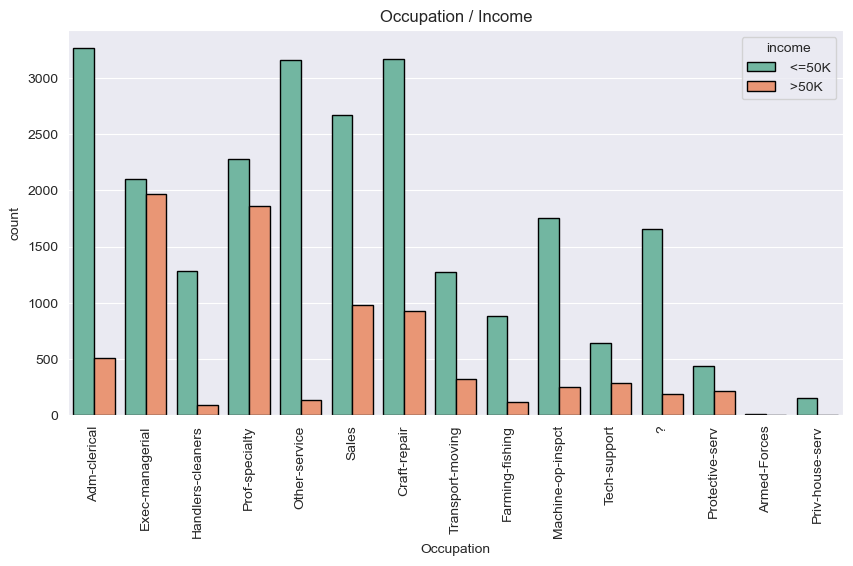

In [43]:
plot(train_df, "occupation")

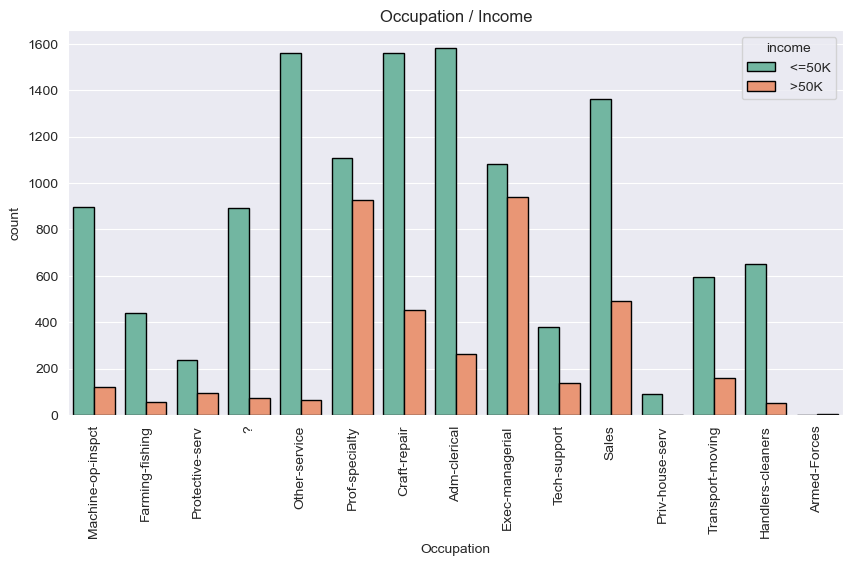

In [44]:
plot(test_df, "occupation")

<Figure size 1000x500 with 0 Axes>

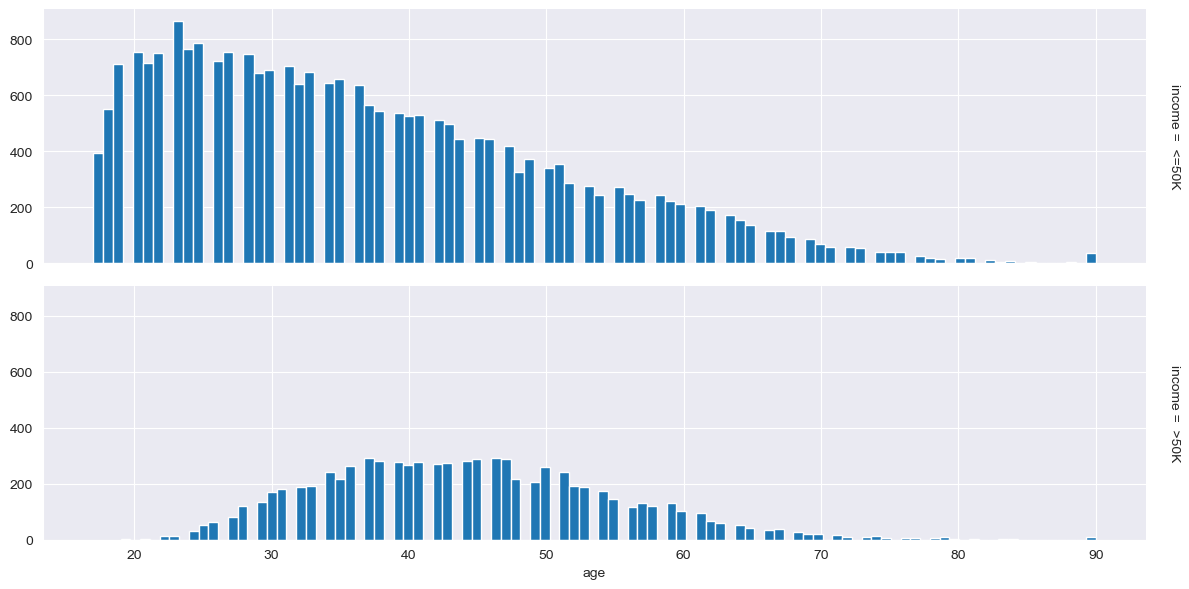

In [45]:
from visualization.viz_utils import num_plot

num_plot(train_df, "age", "income")

<Figure size 1000x500 with 0 Axes>

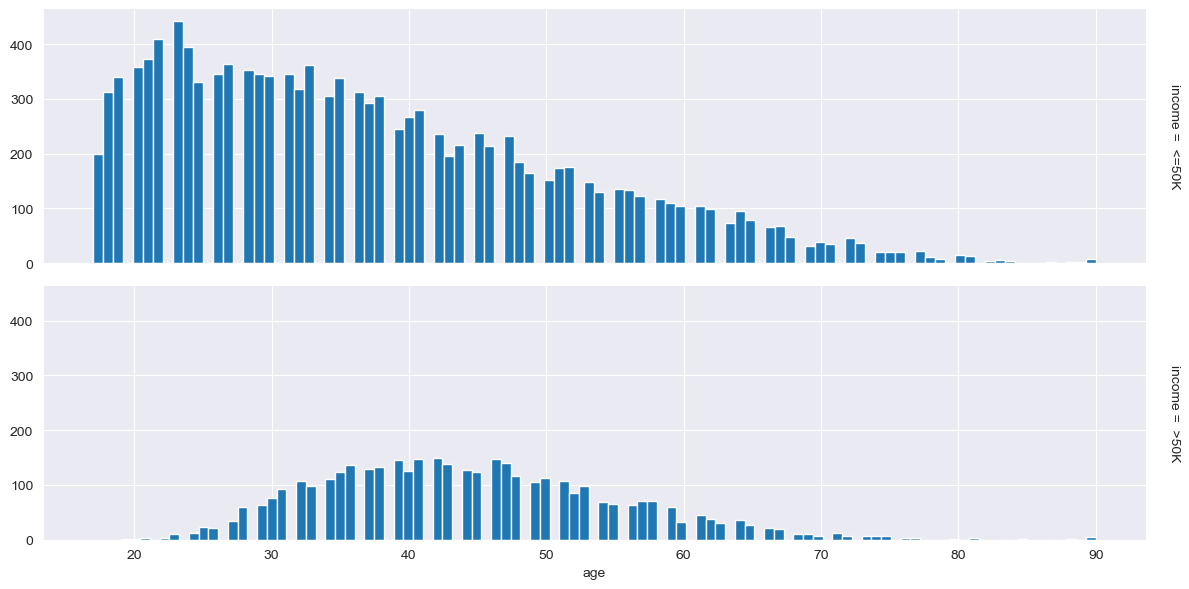

In [46]:
num_plot(test_df, "age", "income")

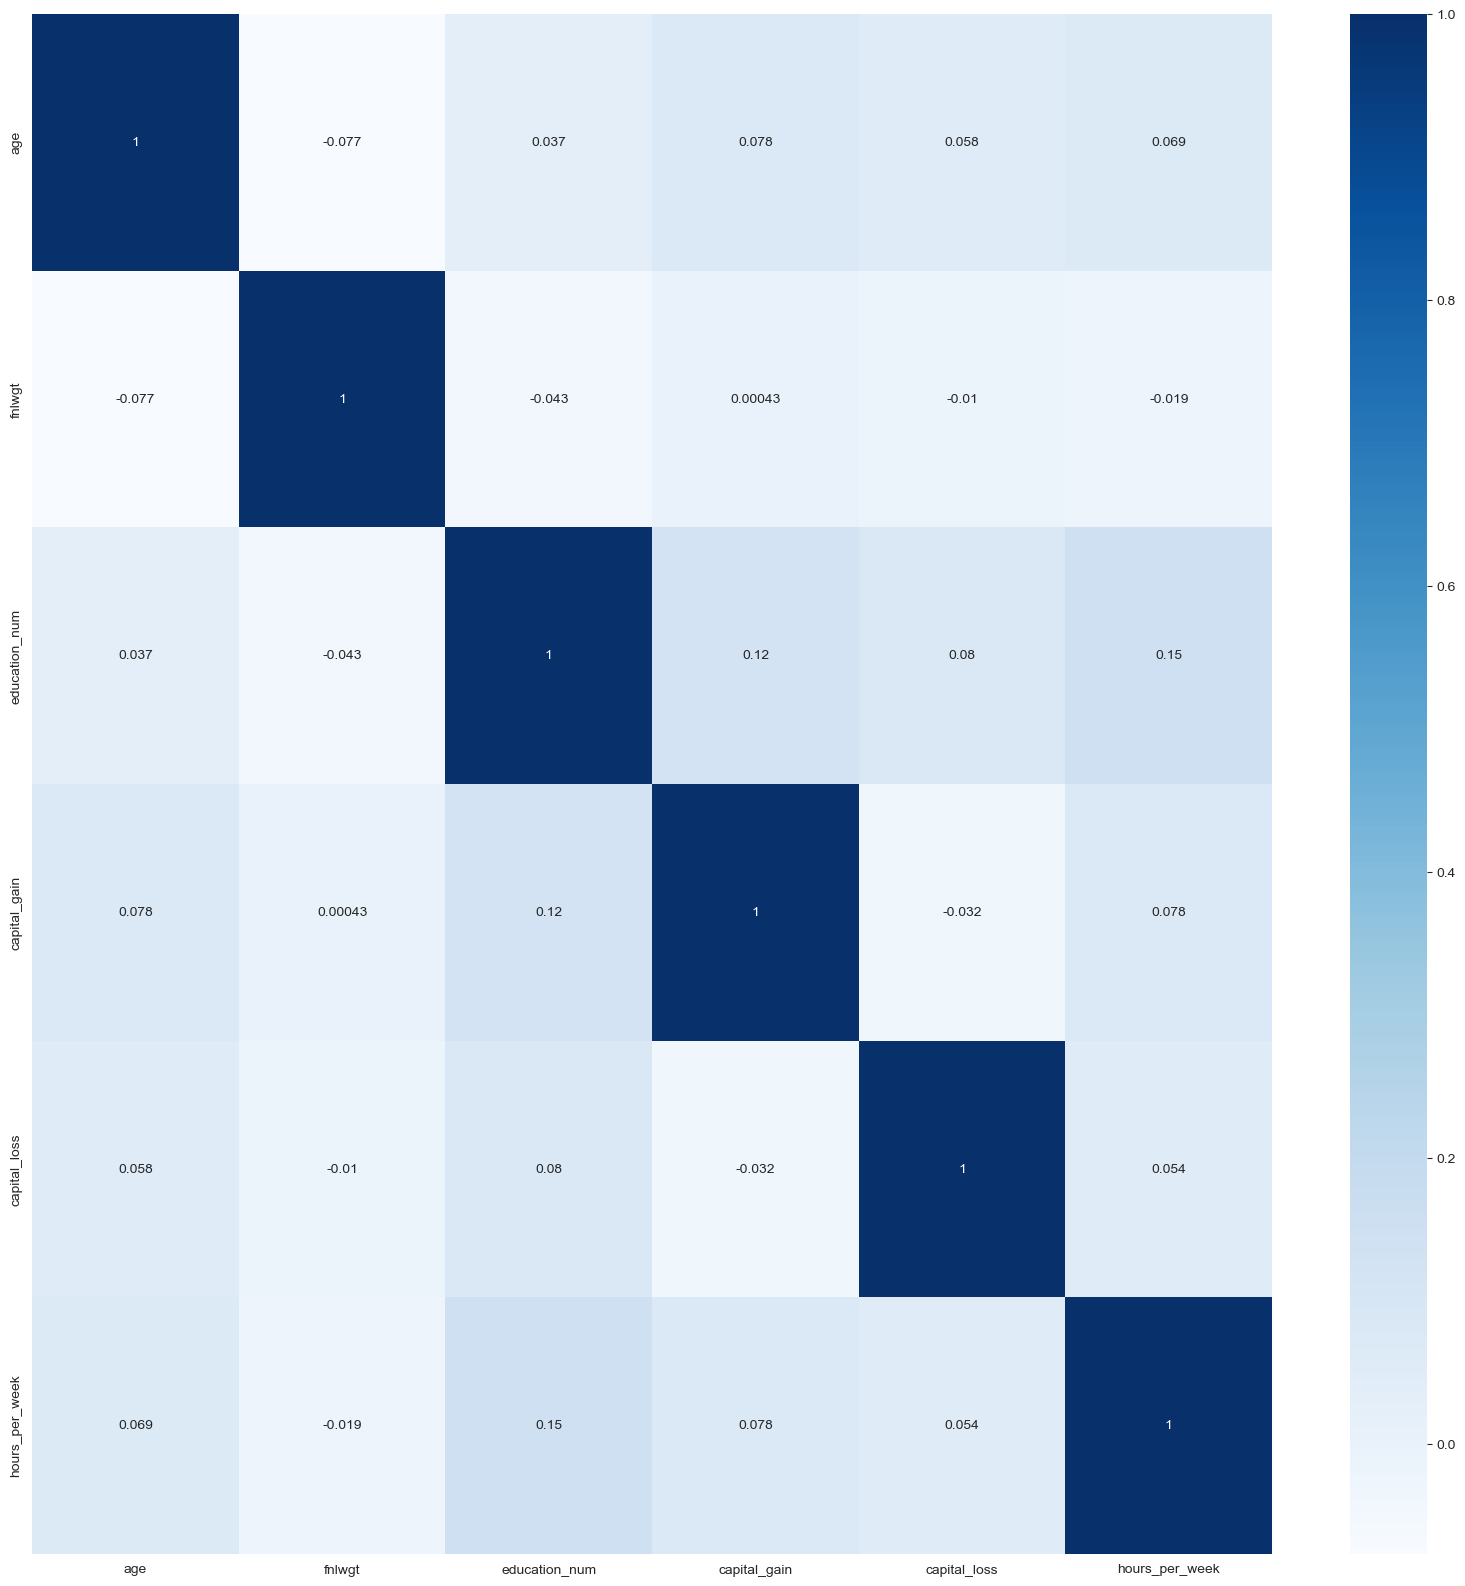

In [47]:
train_cor_df = train_df[NUMERICAL_COLUMNS]

# Set figure size
plt.figure(figsize=(20,20))

# Calculate correlation matrix
correlation = train_cor_df.corr() 

# Plot the correlation matrix
sns.heatmap(correlation, annot=True, cmap=plt.cm.Blues)
plt.show()

In [48]:
train_df.to_csv("data/train_cleaned.csv", index = False)
test_df.to_csv("data/test_cleaned.csv", index = False)